## Importing Packages and Loading the Dataset

In [3]:
!pip3 install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings, gc, joblib

warnings.filterwarnings('ignore')
dataframe = pd.read_csv('Weather Data.csv')

## Exploratory Data Analysis

In [6]:
dataframe.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
dataframe.rename(columns={'Temp_C': 'Temperature', 'Dew Point Temp_C': 'Dew_Point_Temperature', 'Rel Hum_%' : 'Humidity', 'Wind Speed_km/h' : 'Wind_Speed', 'Press_kPa' : 'Pressure', 'Visibility_km' : 'Visibility'}, inplace=True)

In [8]:
dataframe.head()

,Date/Time,Temperature,Dew_Point_Temperature,Humidity,Wind_Speed,Visibility,Pressure,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date/Time              8784 non-null   object 
 1   Temperature            8784 non-null   float64
 2   Dew_Point_Temperature  8784 non-null   float64
 3   Humidity               8784 non-null   int64  
 4   Wind_Speed             8784 non-null   int64  
 5   Visibility             8784 non-null   float64
 6   Pressure               8784 non-null   float64
 7   Weather                8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [10]:
dataframe.shape

(8784, 8)

In [11]:
dataframe.columns

Index(['Date/Time', 'Temperature', 'Dew_Point_Temperature', 'Humidity',
       'Wind_Speed', 'Visibility', 'Pressure', 'Weather'],
      dtype='object')

In [12]:
dataframe.dtypes

Date/Time                 object
Temperature              float64
Dew_Point_Temperature    float64
Humidity                   int64
Wind_Speed                 int64
Visibility               float64
Pressure                 float64
Weather                   object
dtype: object

In [13]:
dataframe.nunique()

Date/Time                8784
Temperature               533
Dew_Point_Temperature     489
Humidity                   83
Wind_Speed                 34
Visibility                 24
Pressure                  518
Weather                    50
dtype: int64

In [14]:
dataframe.count()

Date/Time                8784
Temperature              8784
Dew_Point_Temperature    8784
Humidity                 8784
Wind_Speed               8784
Visibility               8784
Pressure                 8784
Weather                  8784
dtype: int64

In [15]:
dataframe.isnull().sum()

Date/Time                0
Temperature              0
Dew_Point_Temperature    0
Humidity                 0
Wind_Speed               0
Visibility               0
Pressure                 0
Weather                  0
dtype: int64

In [16]:
dataframe.describe()

,Temperature,Dew_Point_Temperature,Humidity,Wind_Speed,Visibility,Pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Skewness of Temperature: -0.17766634898276745
Kurtosis of Temperature: -0.9155567505542197


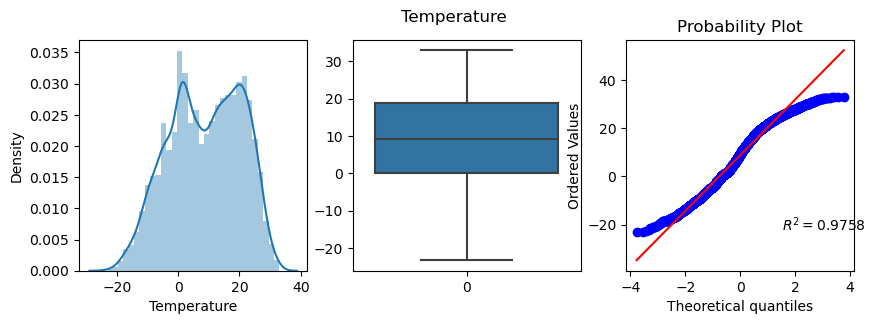

Skewness of Dew_Point_Temperature: -0.31843338608156885
Kurtosis of Dew_Point_Temperature: -0.8157875944814732


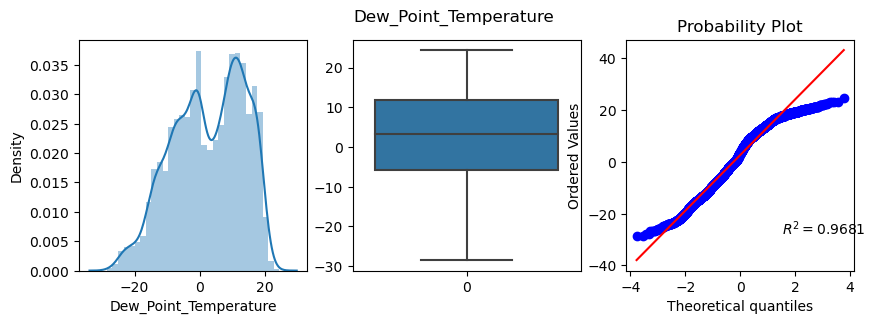

Skewness of Humidity: -0.32383026939145887
Kurtosis of Humidity: -0.5529352317433536


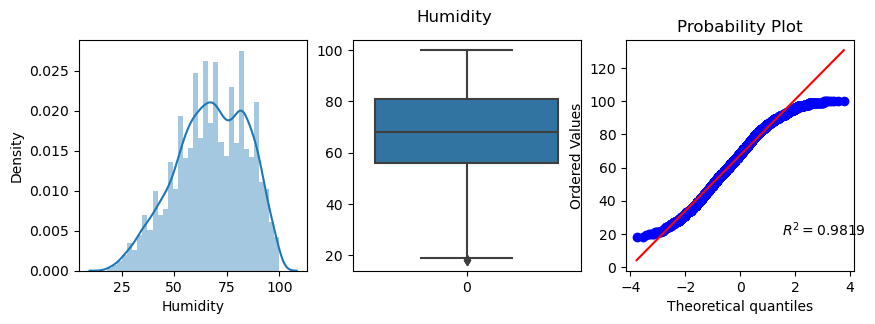

Skewness of Wind_Speed: 0.8713742625776061
Kurtosis of Wind_Speed: 1.5407125247939306


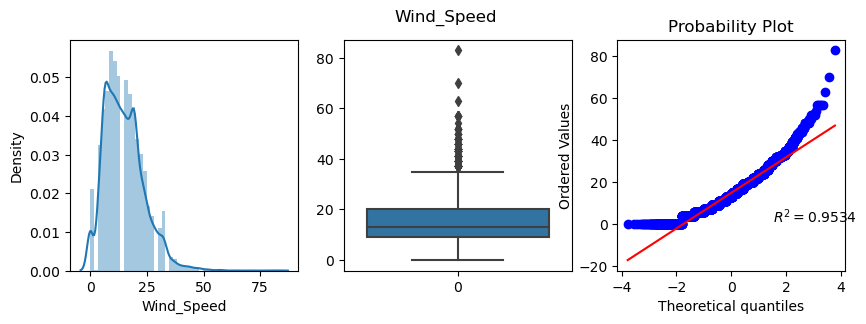

Skewness of Visibility: 0.41336159676061063
Kurtosis of Visibility: -0.35103132005897164


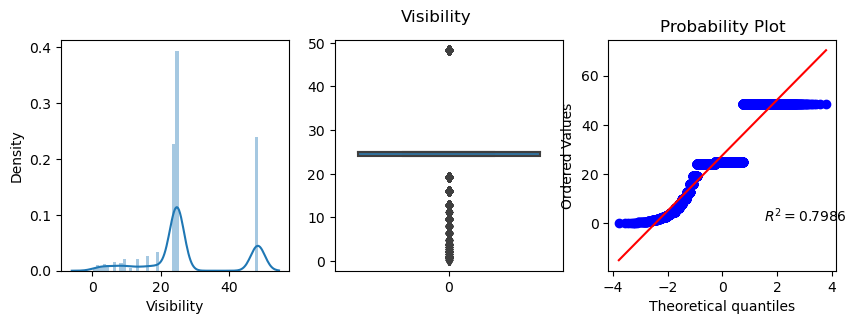

Skewness of Pressure: -0.22992511978286803
Kurtosis of Pressure: 0.7144508236613349


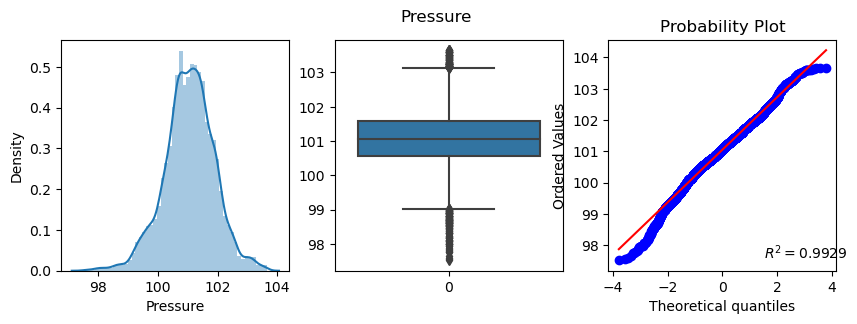

In [17]:
from scipy.stats import probplot
for col in dataframe.select_dtypes(np.number).columns:
    plt.figure(figsize=(10,3))
    print(f"Skewness of {col}:",dataframe[col].skew())
    print(f"Kurtosis of {col}:",dataframe[col].kurtosis())
    plt.subplot(131)
    sns.distplot(dataframe[col])
    plt.subplot(132)
    sns.boxplot(dataframe[col])
    plt.subplot(133)
    probplot(dataframe[col],dist='norm',rvalue=True,plot=plt)
    plt.suptitle(col)
    plt.show()


<Axes: >

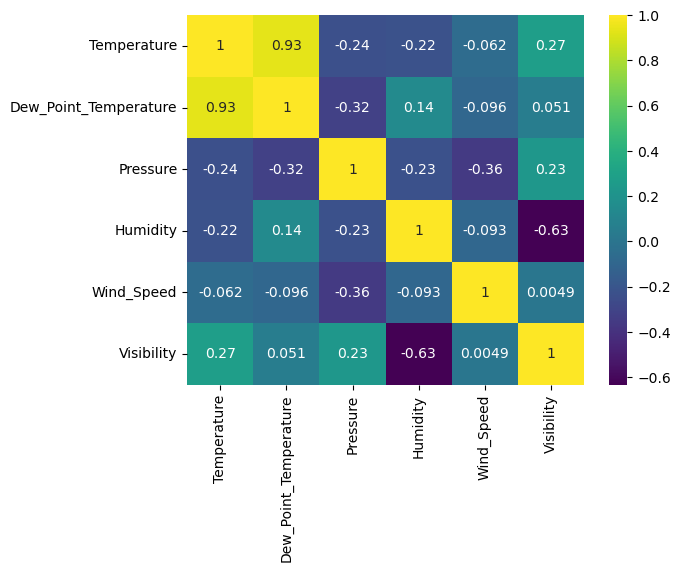

In [18]:
import seaborn as sns
df2 = dataframe[['Temperature','Dew_Point_Temperature','Pressure','Humidity','Wind_Speed','Visibility']]
sns.heatmap(data= df2.corr() , annot=True , cmap='viridis' )

In [19]:
##fig = sns.pairplot(dataframe,hue='Weather',palette='viridis')
##plt.show(fig)
##plt.close('all')
##del fig
##gc.collect()

In [20]:
## sns.pairplot(data=df2.sample(500), height=3, plot_kws={'alpha': 0.5}, palette='viridis')

In [21]:
##weather = dataframe['Weather']

In [22]:
dataframe['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

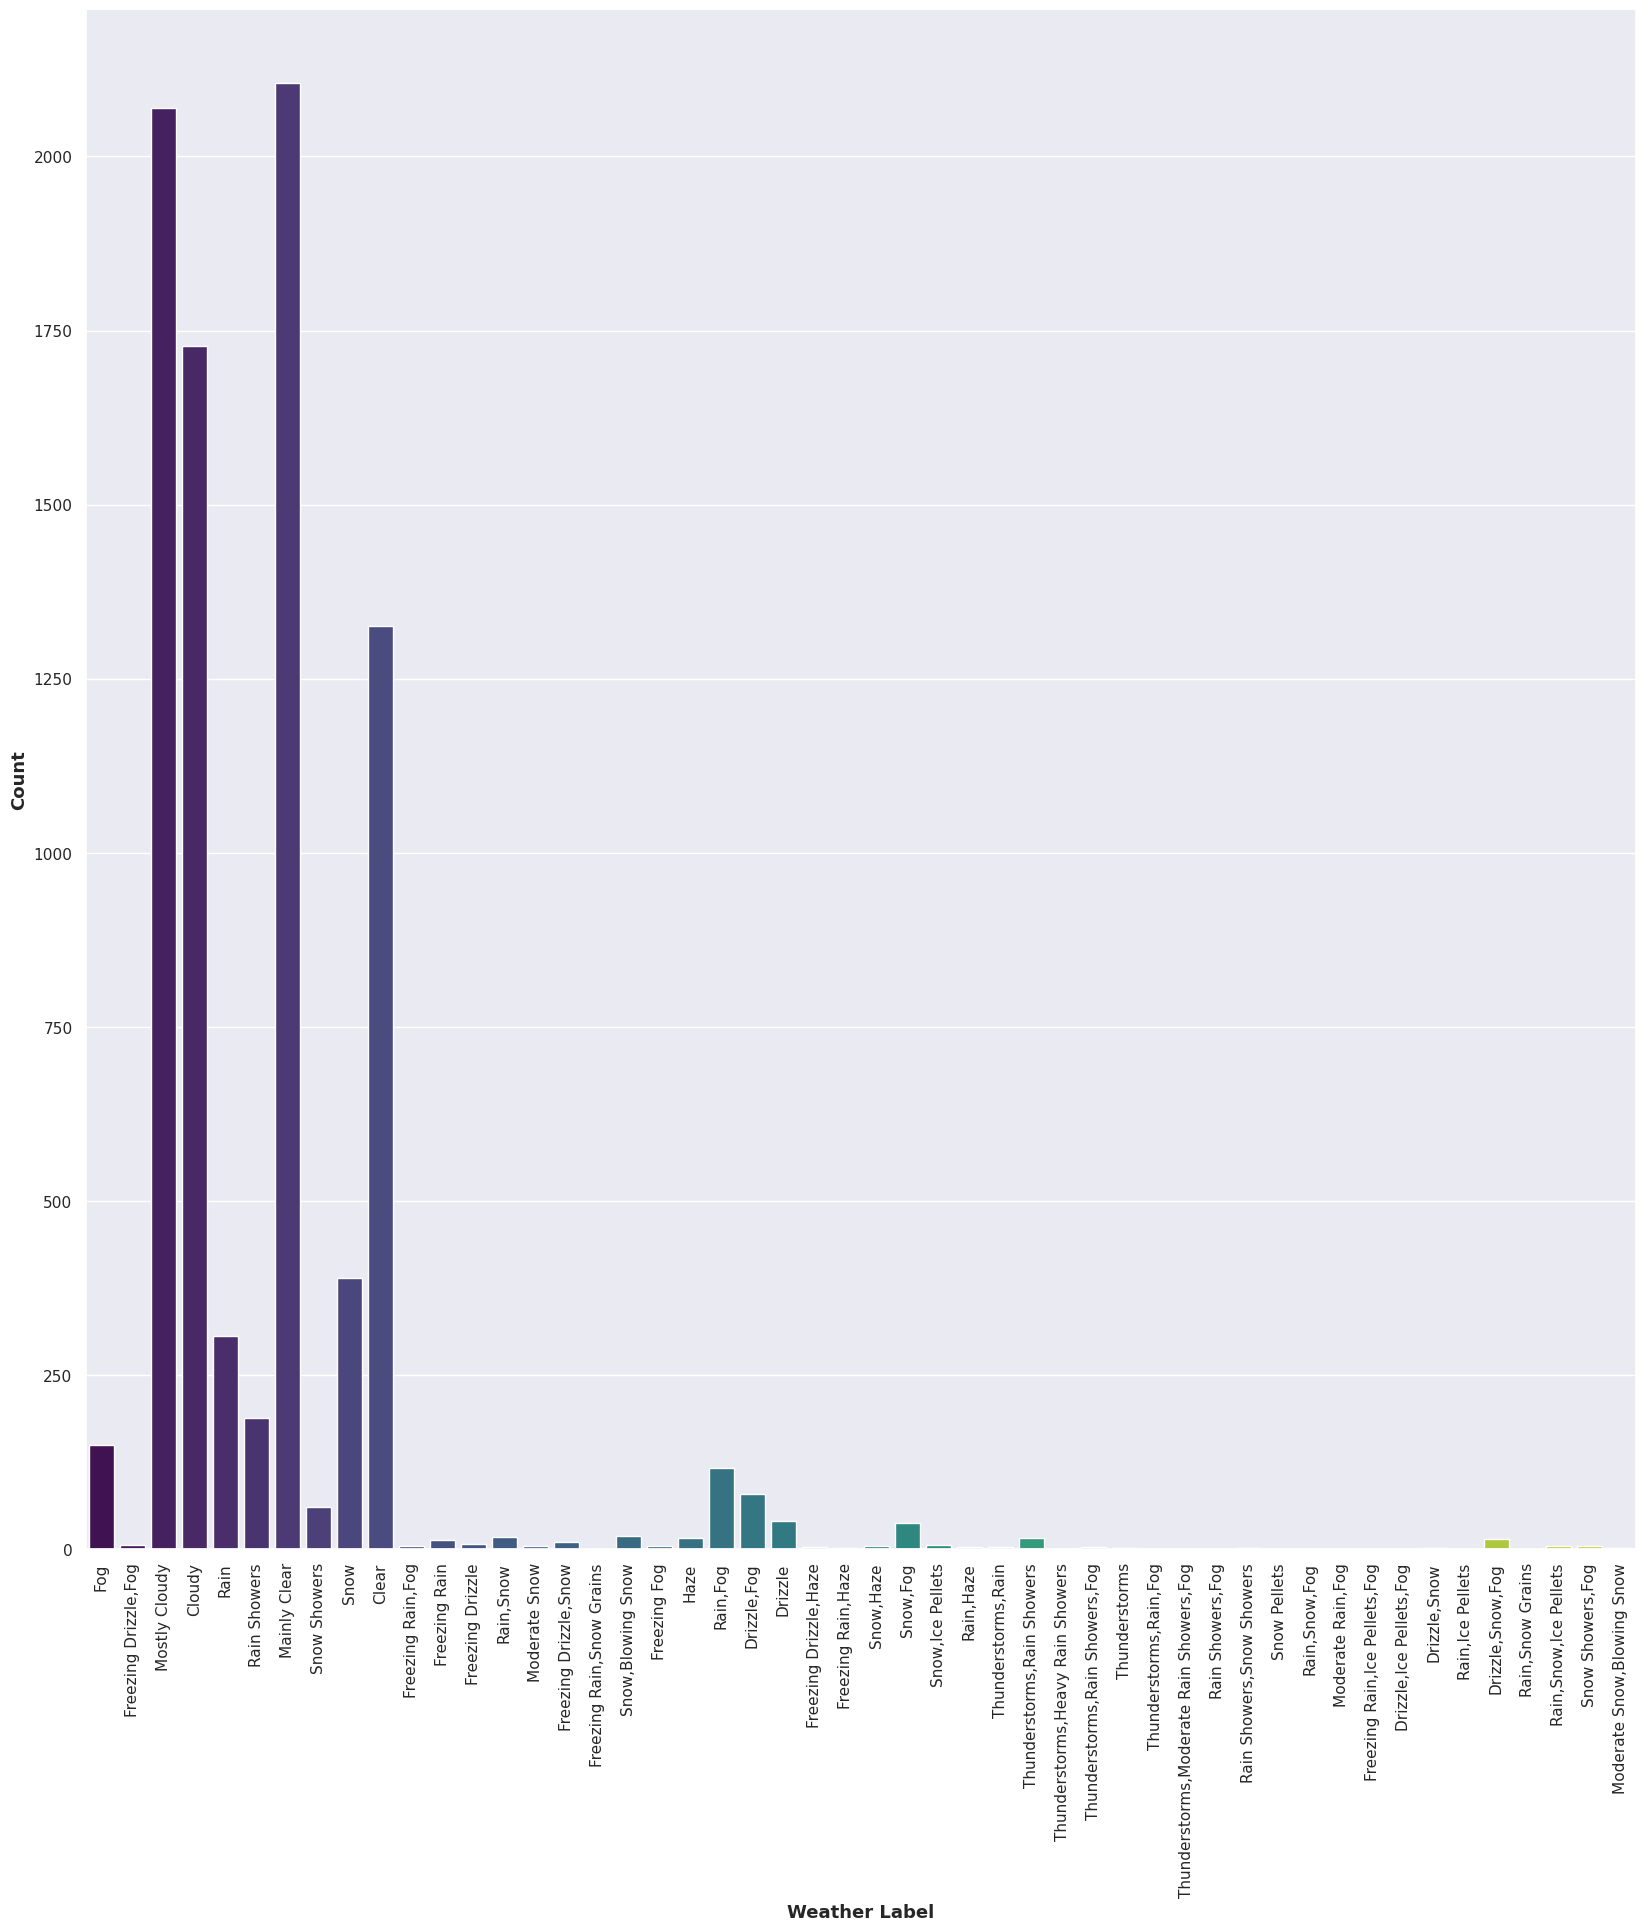

In [23]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.countplot(x = 'Weather',data = dataframe,palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Weather Label",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

In [24]:
dataframe[dataframe['Weather'].str.contains('Rain')]

,Date/Time,Temperature,Dew_Point_Temperature,Humidity,Wind_Speed,Visibility,Pressure,Weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain
22,1/1/2012 22:00,4.4,1.9,84,24,19.3,99.32,Rain Showers
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
153,1/7/2012 9:00,-6.1,-8.7,82,7,9.7,100.15,"Freezing Rain,Fog"
...,...,...,...,...,...,...,...,...
8537,12/21/2012 17:00,1.3,0.2,92,46,12.9,97.76,Rain
8538,12/21/2012 18:00,1.4,0.3,92,46,25.0,97.56,Rain
8539,12/21/2012 19:00,2.3,1.1,92,37,11.3,97.52,Rain
8540,12/21/2012 20:00,2.4,1.7,95,15,9.7,97.58,Rain


In [25]:
dataframe_copy = dataframe.copy()

In [26]:
dataframe_copy

,Date/Time,Temperature,Dew_Point_Temperature,Humidity,Wind_Speed,Visibility,Pressure,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [27]:
dataframe_copy.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [28]:
categories = ['Clear','Cloudy','Snow','Rain','Drizzle','Fog','HeavyRain','Haze']

##dataframe_copy.Weather.replace(to_replace='Mainly Clear',value='Clear',inplace=True)
##dataframe_copy.Weather.replace(to_replace='Mostly Cloudy',value='Cloudy',inplace=True)
##dataframe_copy.Weather.replace(to_replace=['Snow Showers','Snow,Blowing Snow','Rain,Snow','Freezing Drizzle,Snow','Freezing Rain,Snow Grains','Snow,Ice Pellets','Moderate Snow','Rain,Snow,Ice Pellets','Drizzle,Snow','Rain Showers,Snow Showers','Moderate Snow,Blowing Snow','Snow Pellets','Rain,Snow Grains'],value='Snow',inplace=True)
##dataframe_copy.Weather.replace(to_replace=['Rain Showers','Freezing Rain','Rain,Ice Pellets'],value='Rain',inplace=True)
##dataframe_copy.Weather.replace(to_replace='Freezing Drizzle',value='Drizzle',inplace=True)
##dataframe_copy.Weather.replace(to_replace=['Rain,Fog','Drizzle,Fog','Snow,Fog','Drizzle,Snow,Fog','Freezing Drizzle,Fog','Freezing Fog','Snow Showers,Fog','Freezing Rain,Fog','Thunderstorms,Rain Showers,Fog','Rain Showers,Fog','Thunderstorms,Moderate Rain Showers,Fog','Rain,Snow,Fog','Moderate Rain,Fog','Freezing Rain,Ice Pellets,Fog','Drizzle,Ice Pellets,Fog','Thunderstorms,Rain,Fog'],value='Fog',inplace=True)
##dataframe_copy.Weather.replace(to_replace=['Thunderstorms,Rain Showers','Thunderstorms,Rain','Thunderstorms,Heavy Rain Showers','Thunderstorms'],value='HeavyRain',inplace=True)
##dataframe_copy.Weather.replace(to_replace=['Snow,Haze','Rain,Haze','Freezing Drizzle,Haze','Freezing Rain,Haze',],value='Haze',inplace=True)

dataframe_copy.Weather.replace(to_replace='Mainly Clear',value='Clear',inplace=True)
dataframe_copy.Weather.replace(to_replace='Mostly Cloudy',value='Cloudy',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Snow Showers','Snow,Blowing Snow','Rain,Snow','Freezing Drizzle,Snow','Freezing Rain,Snow Grains','Snow,Ice Pellets','Moderate Snow','Rain,Snow,Ice Pellets','Drizzle,Snow','Rain Showers,Snow Showers','Moderate Snow,Blowing Snow','Snow Pellets','Rain,Snow Grains'],value='Snow',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Rain Showers','Freezing Rain','Rain,Ice Pellets'],value='Rain',inplace=True)
dataframe_copy.Weather.replace(to_replace='Freezing Drizzle',value='Drizzle',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Rain,Fog','Drizzle,Fog','Snow,Fog','Drizzle,Snow,Fog','Freezing Drizzle,Fog','Freezing Fog','Snow Showers,Fog','Freezing Rain,Fog','Rain Showers,Fog','Rain,Snow,Fog','Moderate Rain,Fog','Freezing Rain,Ice Pellets,Fog','Drizzle,Ice Pellets,Fog'],value='Fog',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Thunderstorms,Rain Showers','Thunderstorms,Rain','Thunderstorms,Heavy Rain Showers','Thunderstorms', 'Thunderstorms,Rain,Fog','Thunderstorms,Moderate Rain Showers,Fog','Thunderstorms,Rain Showers,Fog'],value='HeavyRain',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Snow,Haze','Rain,Haze','Freezing Drizzle,Haze','Freezing Rain,Haze',],value='Haze',inplace=True)

In [29]:
dataframe_copy.Weather.value_counts()

Weather
Cloudy       3797
Clear        3432
Snow          521
Rain          509
Fog           421
Drizzle        48
Haze           29
HeavyRain      27
Name: count, dtype: int64

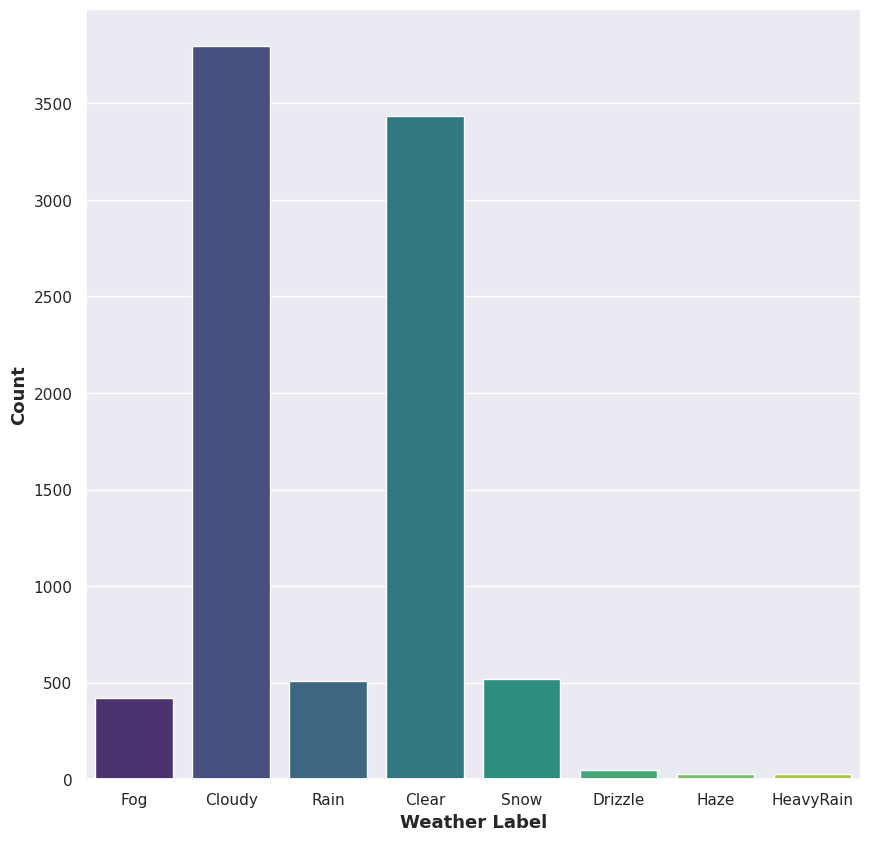

In [30]:
plt.figure(figsize=(10,10))
sns.set_theme()
sns.countplot(x = 'Weather',data = dataframe_copy,palette="viridis")
plt.xlabel("Weather Label",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

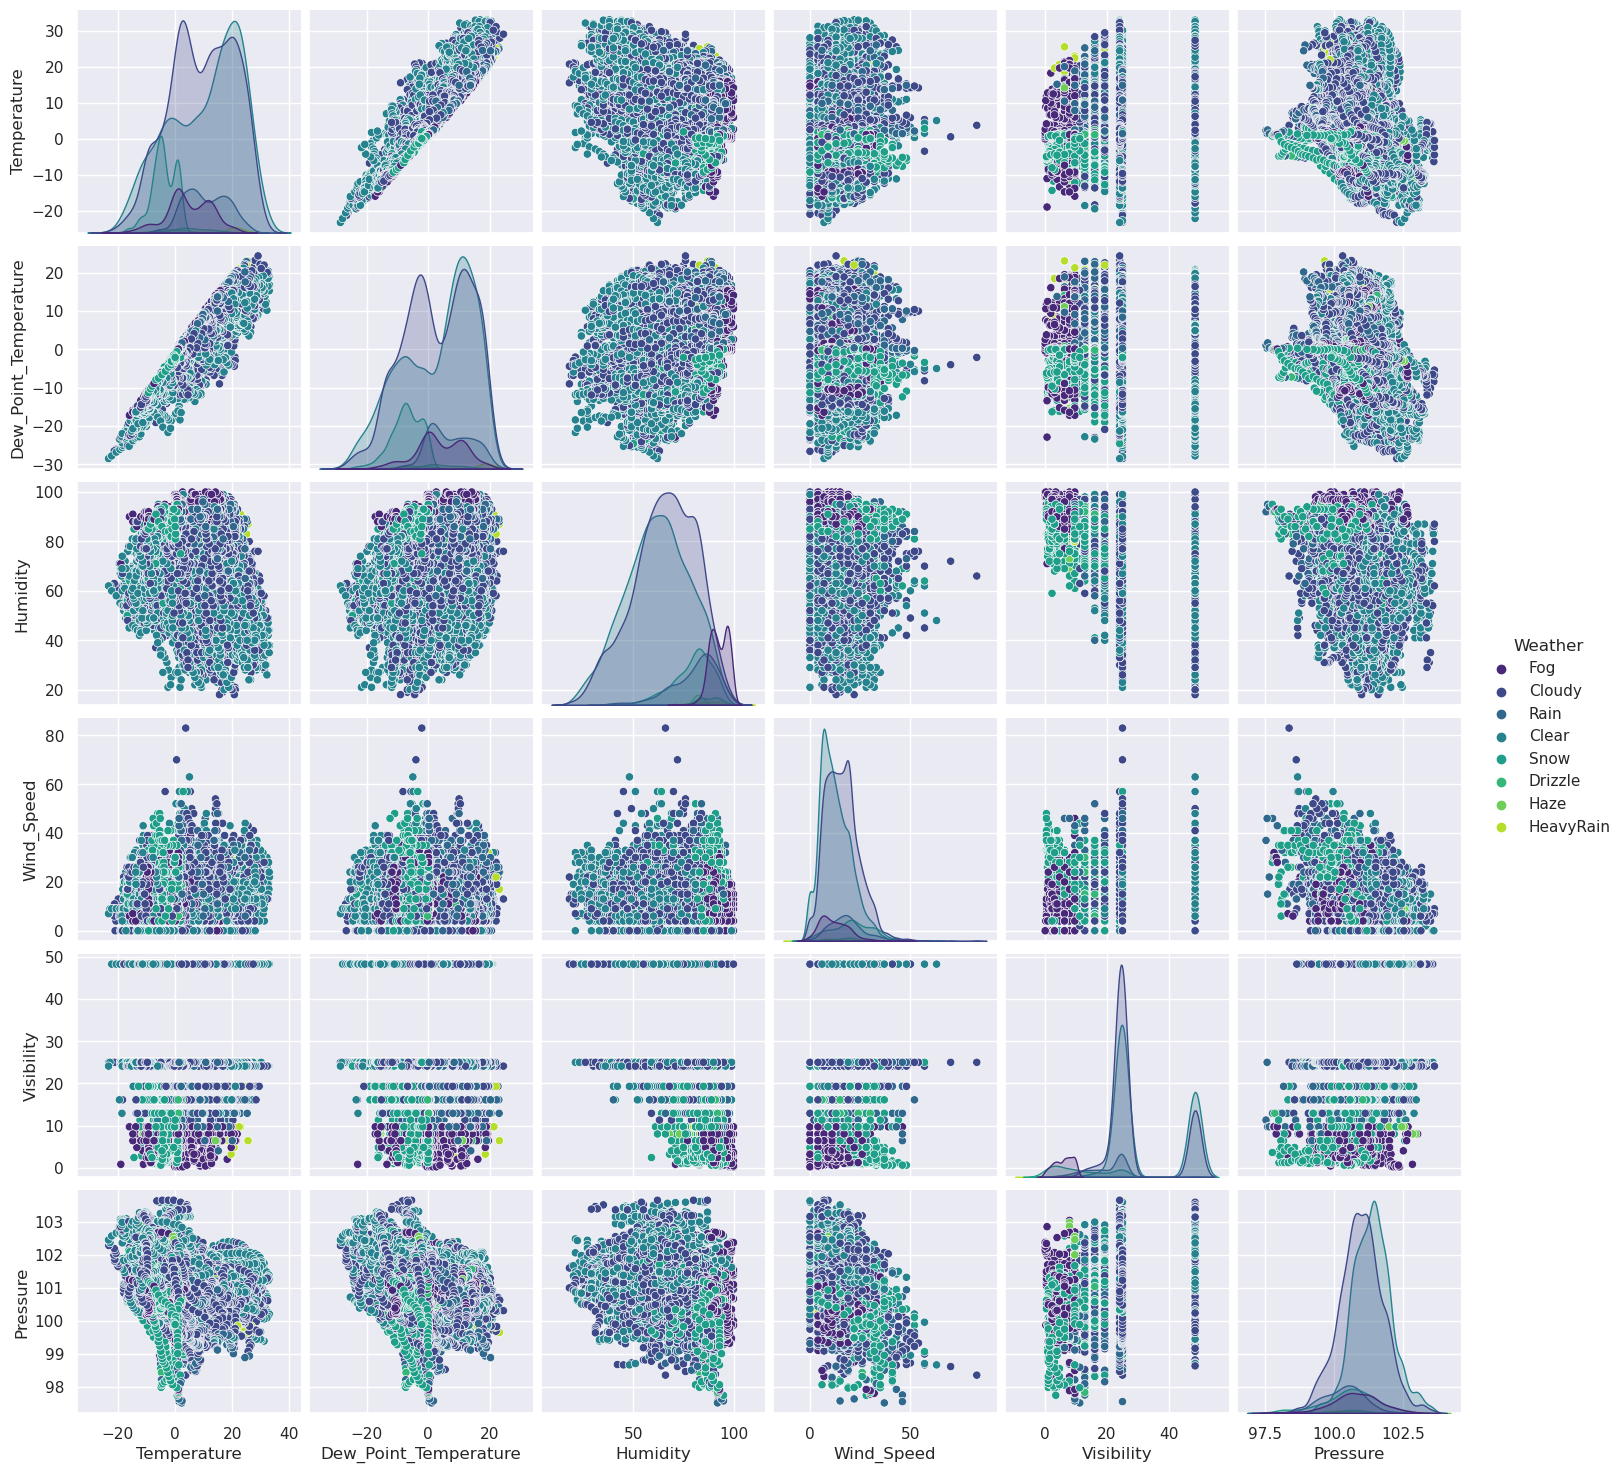

3030

In [31]:
fig = sns.pairplot(dataframe_copy,hue='Weather',palette='viridis')
plt.show(fig)
plt.close('all')
del fig
gc.collect()

## Feature Engineering

In [33]:
dataframe_copy.drop('Date/Time',axis=1,inplace=True)

In [34]:
dataframe_copy

,Temperature,Dew_Point_Temperature,Humidity,Wind_Speed,Visibility,Pressure,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,Fog
3,-1.5,-3.2,88,6,4.0,101.27,Fog
4,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,Snow
8780,0.2,-2.4,83,24,9.7,100.03,Snow
8781,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,-0.2,-1.8,89,28,9.7,99.91,Snow


In [35]:
dataframe[dataframe['Weather'].str.contains('Rain')]

,Date/Time,Temperature,Dew_Point_Temperature,Humidity,Wind_Speed,Visibility,Pressure,Weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain
22,1/1/2012 22:00,4.4,1.9,84,24,19.3,99.32,Rain Showers
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
153,1/7/2012 9:00,-6.1,-8.7,82,7,9.7,100.15,"Freezing Rain,Fog"
...,...,...,...,...,...,...,...,...
8537,12/21/2012 17:00,1.3,0.2,92,46,12.9,97.76,Rain
8538,12/21/2012 18:00,1.4,0.3,92,46,25.0,97.56,Rain
8539,12/21/2012 19:00,2.3,1.1,92,37,11.3,97.52,Rain
8540,12/21/2012 20:00,2.4,1.7,95,15,9.7,97.58,Rain


In [36]:
dataframe_copy.keys()

Index(['Temperature', 'Dew_Point_Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Pressure', 'Weather'],
      dtype='object')

In [37]:
skewed_cols = ['Pressure','Visibility','Wind_Speed']

def remove_outliers(data,col):
    lower_limit, upper_limit = data[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(data[col]<lower_whisker,lower_whisker,np.where(data[col]>upper_whisker,upper_whisker,data[col]))

In [38]:
for col in skewed_cols:
    dataframe_copy[col] = remove_outliers(dataframe_copy,col)

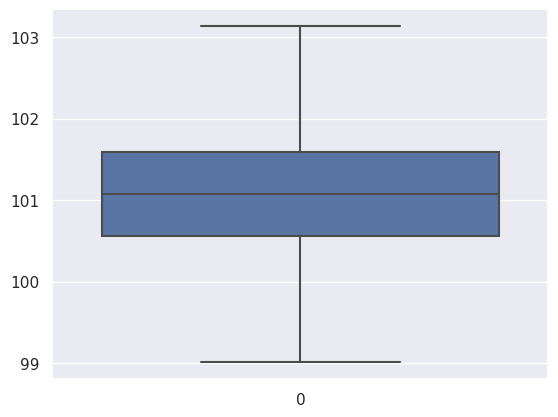

In [39]:
fig = sns.boxplot(dataframe_copy['Pressure'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

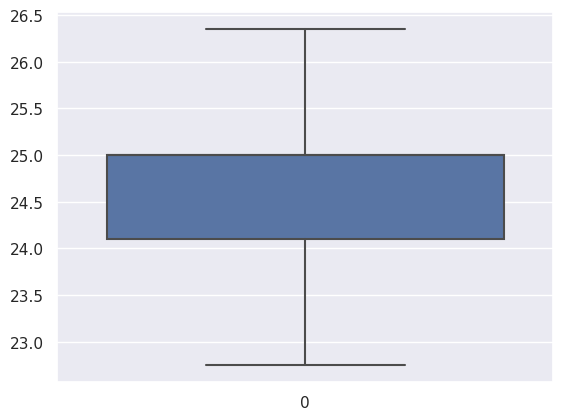

In [40]:
fig = sns.boxplot(dataframe_copy['Visibility'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

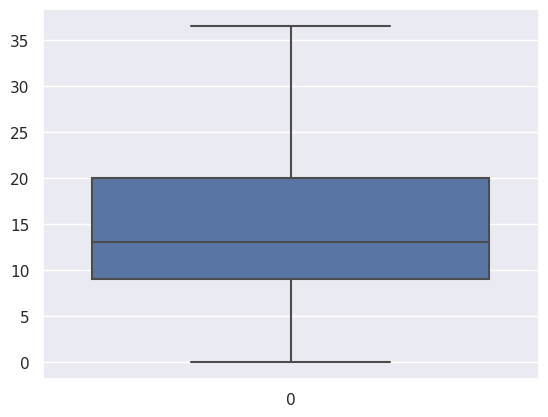

In [41]:
fig = sns.boxplot(dataframe_copy['Wind_Speed'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

In [42]:
X = dataframe_copy.drop('Weather',axis=1)
y = dataframe_copy.Weather

In [43]:
X

,Temperature,Dew_Point_Temperature,Humidity,Wind_Speed,Visibility,Pressure
0,-1.8,-3.9,86,4.0,22.75,101.24
1,-1.8,-3.7,87,4.0,22.75,101.24
2,-1.8,-3.4,89,7.0,22.75,101.26
3,-1.5,-3.2,88,6.0,22.75,101.27
4,-1.5,-3.3,88,7.0,22.75,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30.0,22.75,100.13
8780,0.2,-2.4,83,24.0,22.75,100.03
8781,-0.5,-1.5,93,28.0,22.75,99.95
8782,-0.2,-1.8,89,28.0,22.75,99.91


In [44]:
from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE()
X, y = borderline_smote.fit_resample(X,y)

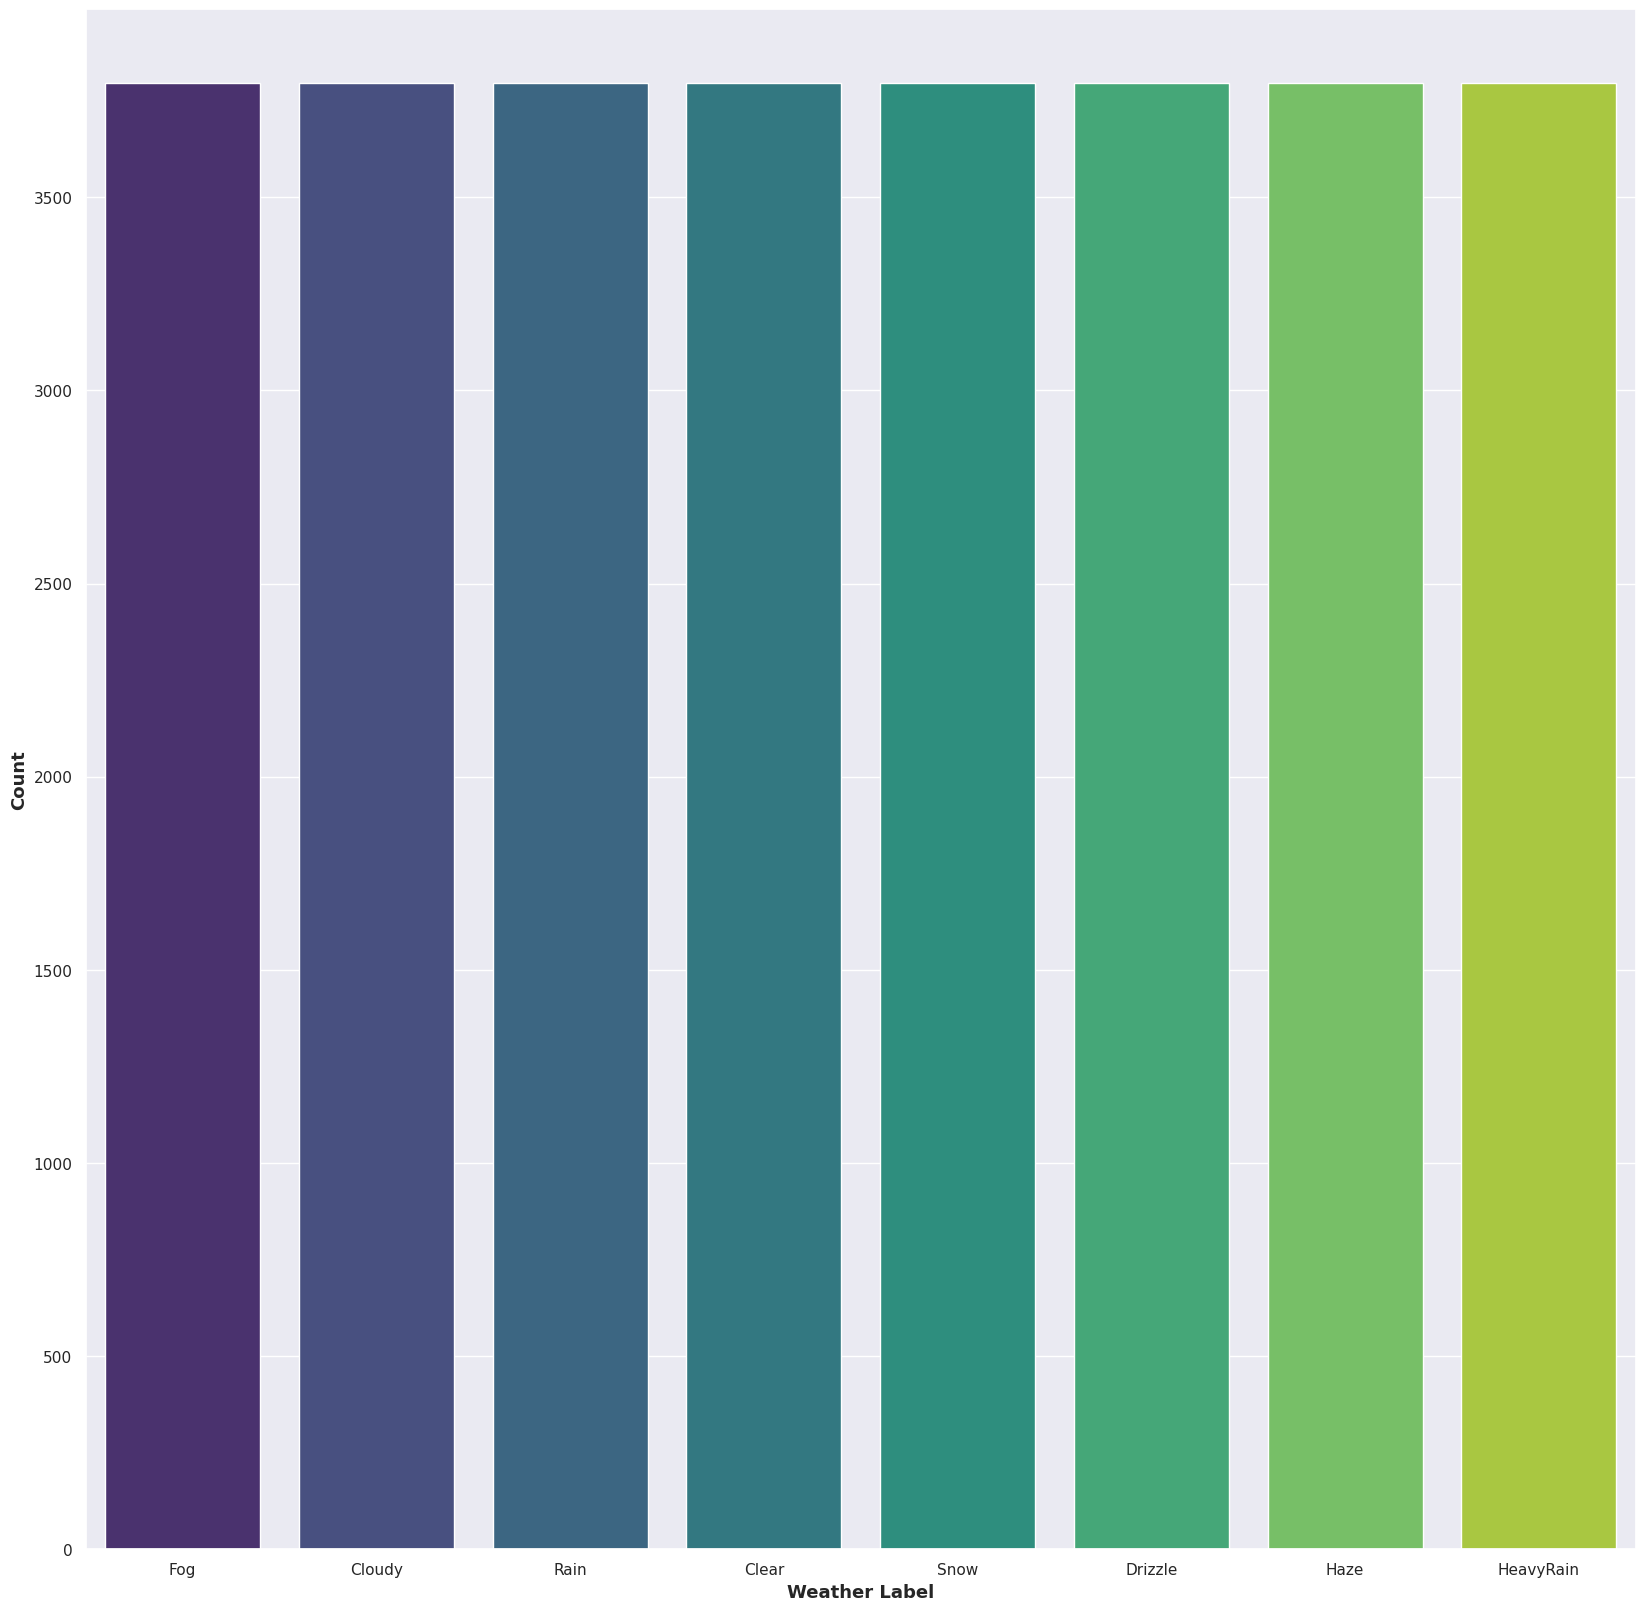

In [45]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.countplot(x = y ,data = dataframe_copy,palette="viridis")
plt.xlabel("Weather Label",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

In [46]:
y.value_counts()

Weather
Fog          3797
Cloudy       3797
Rain         3797
Clear        3797
Snow         3797
Drizzle      3797
Haze         3797
HeavyRain    3797
Name: count, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold, GridSearchCV, RepeatedKFold
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21263, 6)
(9113, 6)
(21263,)
(9113,)


In [49]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [50]:
encoder.classes_

array(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain',
       'Snow'], dtype=object)

In [51]:
label_mapping = {label:idx for idx, label in enumerate(encoder.classes_)}
label_mapping

{'Clear': 0,
 'Cloudy': 1,
 'Drizzle': 2,
 'Fog': 3,
 'Haze': 4,
 'HeavyRain': 5,
 'Rain': 6,
 'Snow': 7}

## Feature Selection

In [53]:
##from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures

In [54]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold, GridSearchCV, RepeatedKFold

In [55]:
print(X_train.shape)
print(X_test.shape)

(21263, 6)
(9113, 6)


In [56]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
kbest = SelectKBest(k=5,score_func=f_classif)
kbest.fit(X_train,y_train)

SelectKBest(k=5)

In [57]:
selectedFeatures = kbest.get_feature_names_out()
featureScores = kbest.scores_
selectedFeatures

array(['Temperature', 'Dew_Point_Temperature', 'Humidity', 'Visibility',
       'Pressure'], dtype=object)

In [58]:
featureScores

array([2980.54604147, 3138.33683352, 3180.53031257,  843.49929857,
       4990.34531242,  906.49345735])

In [59]:
from sklearn.ensemble import RandomForestClassifier
selectFrom = SelectFromModel(estimator=RandomForestClassifier(),max_features=5)
selectFrom.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=5)

In [60]:
selectedFeatures = selectFrom.get_feature_names_out()
selectedFeatures

array(['Temperature', 'Dew_Point_Temperature', 'Humidity'], dtype=object)

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [62]:
def plotFeatureImportance(importanceType):
    featureImportance = xgb.get_booster().get_score(importance_type=importanceType)
    keys = list(featureImportance.keys())
    values = list(featureImportance.values())
    featureImportancedf = pd.DataFrame(data=values, index=keys, columns=["Importance"]).sort_values(by="Importance", ascending=False).reset_index()
    featureImportancedf.rename({'index': 'Feature'},axis=1,inplace=True)
    fig = sns.barplot(x='Importance',y='Feature',data=featureImportancedf,orient='horizontal',palette='viridis')
    plt.title(f"{importanceType.title()} Feature Importance")
    plt.show(fig)
    plt.close('all')
    del fig
    gc.collect();

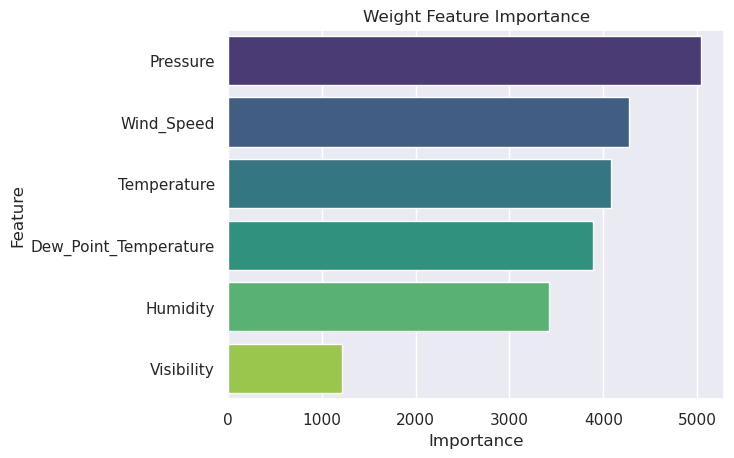

In [63]:
plotFeatureImportance('weight')

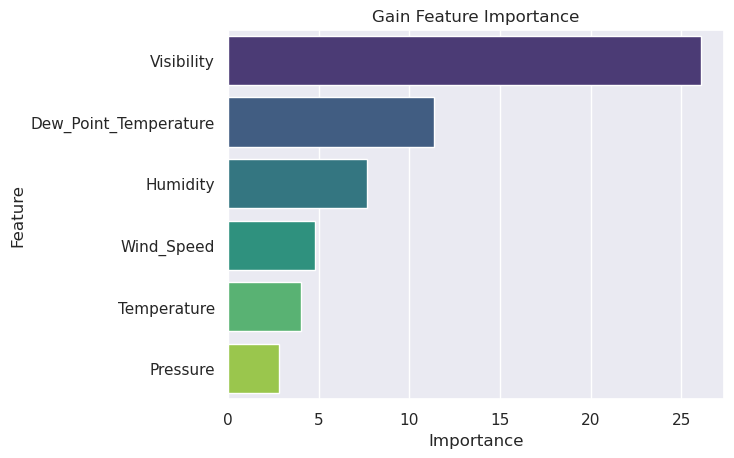

In [64]:
plotFeatureImportance('gain')

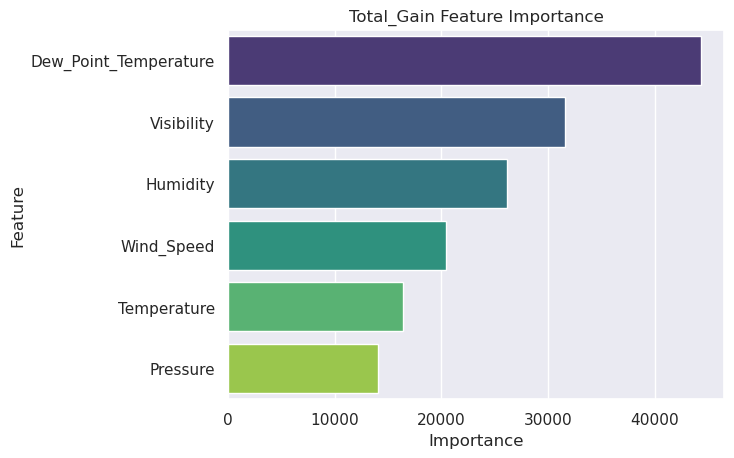

In [65]:
plotFeatureImportance('total_gain')

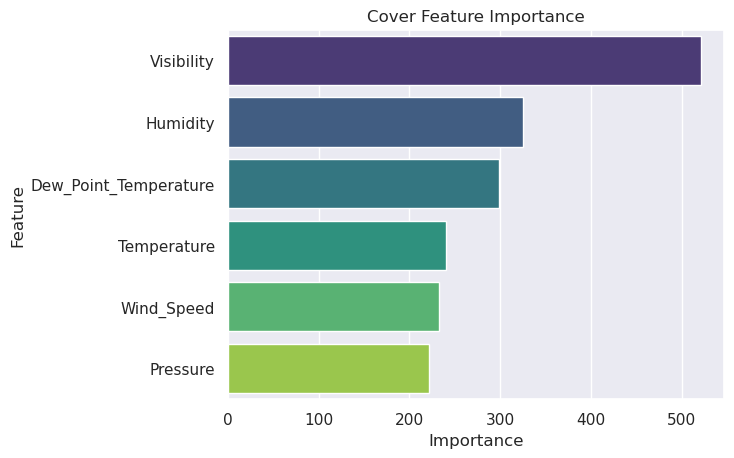

In [66]:
plotFeatureImportance('cover')

In [67]:
selectedFeatures = ['Temperature', 'Dew_Point_Temperature', 'Humidity', 'Visibility']
newX_train = X_train[selectedFeatures]
newX_test = X_test[selectedFeatures]

## Feature Scaling

In [69]:
sc = StandardScaler()
newX_train = sc.fit_transform(newX_train)
newX_test = sc.transform(newX_test)

## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(newX_train, y_train)

LogisticRegression(random_state=0)

In [72]:
y_pred = classifierLR.predict(newX_test)

In [73]:
y_pred

array([6, 1, 3, ..., 0, 3, 0])

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 453  420   49   16    7   15   80  110]
 [ 265  444   55   30   34   49  145  108]
 [  11   16  264  451   97    1  319    0]
 [   0    0    0  895   84   87   31   50]
 [   0    0    0    0 1123    0    1    0]
 [   0    0    0   14    0 1093   16    0]
 [  35  233  159  225   69  143  290    4]
 [   2  126   66  187  488    0    1  252]]


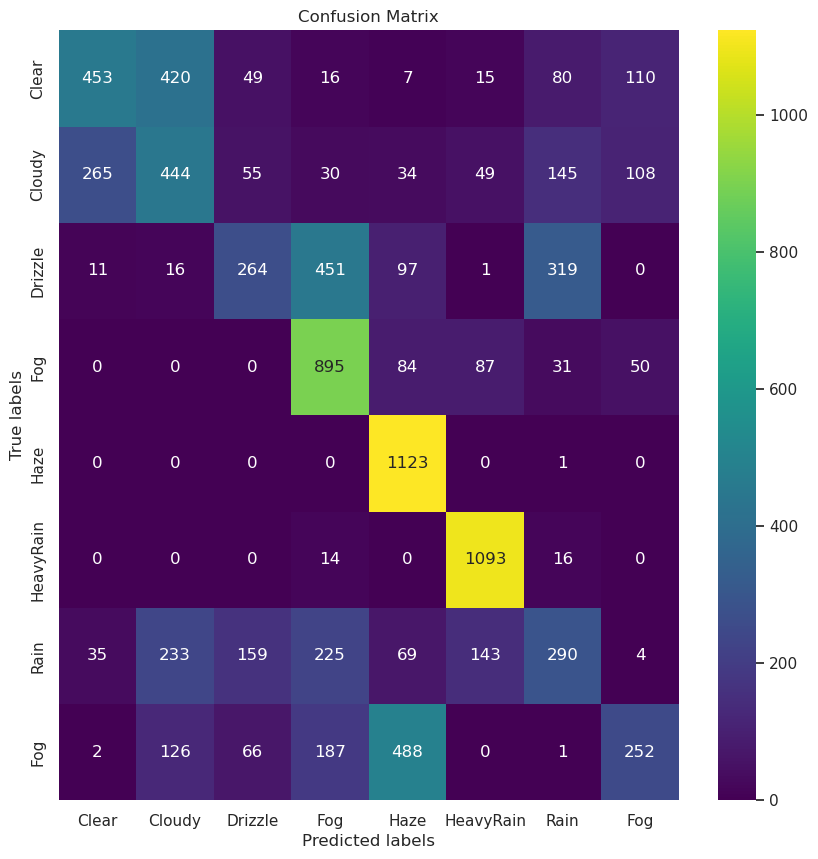

In [75]:
sns.set_theme(rc={'figure.figsize':(10,10)})
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']); ax.yaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']);

In [76]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.39      0.47      1150
           1       0.36      0.39      0.37      1130
           2       0.45      0.23      0.30      1159
           3       0.49      0.78      0.60      1147
           4       0.59      1.00      0.74      1124
           5       0.79      0.97      0.87      1123
           6       0.33      0.25      0.28      1158
           7       0.48      0.22      0.31      1122

    accuracy                           0.53      9113
   macro avg       0.51      0.53      0.49      9113
weighted avg       0.51      0.53      0.49      9113



In [77]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.528256337100845


## Decision Trees

In [79]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(newX_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [80]:
y_pred = classifierDT.predict(newX_test)

In [81]:
y_pred

array([6, 0, 6, ..., 1, 2, 1])

In [82]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 654  390    1    8    2    5   47   43]
 [ 370  570    5   26    2    6   94   57]
 [   4    6 1050   30   17    1   35   16]
 [   2   18   38  911    3   19   84   72]
 [   0    1   10    7 1060    0    9   37]
 [   2    4    0   22    0 1083   12    0]
 [  53   92   35   94   12   34  815   23]
 [  21   43    9   89   32    0   22  906]]


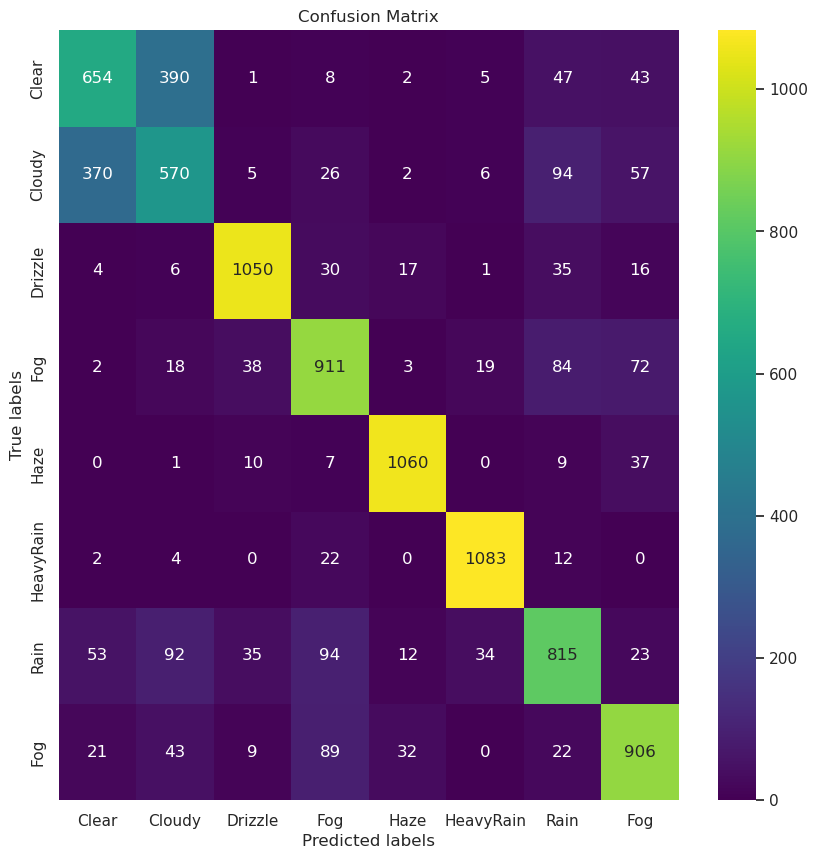

In [83]:
sns.set_theme(rc={'figure.figsize':(10,10)})
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']); ax.yaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']);

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1150
           1       0.51      0.50      0.51      1130
           2       0.91      0.91      0.91      1159
           3       0.77      0.79      0.78      1147
           4       0.94      0.94      0.94      1124
           5       0.94      0.96      0.95      1123
           6       0.73      0.70      0.72      1158
           7       0.79      0.81      0.80      1122

    accuracy                           0.77      9113
   macro avg       0.77      0.77      0.77      9113
weighted avg       0.77      0.77      0.77      9113



In [85]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.7735103698013827


## Random Forest

In [87]:
forest= RandomForestClassifier(n_estimators =30, random_state = 0)
forest.fit(newX_train,y_train)
RandomForestClassifier(n_estimators=30, random_state=0)

RandomForestClassifier(n_estimators=30, random_state=0)

In [88]:
y_pred = forest.predict(newX_test)

In [89]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 701  365    1   13    2    2   42   24]
 [ 364  579    5   33    3    5   91   50]
 [   1    2 1094   12   18    0   17   15]
 [   1    8   42  947    4   21   68   56]
 [   0    3    4    4 1090    0    2   21]
 [   2    1    0   15    0 1099    6    0]
 [  35   68   40   90   13   36  853   23]
 [  13   32   10   84   34    0   16  933]]


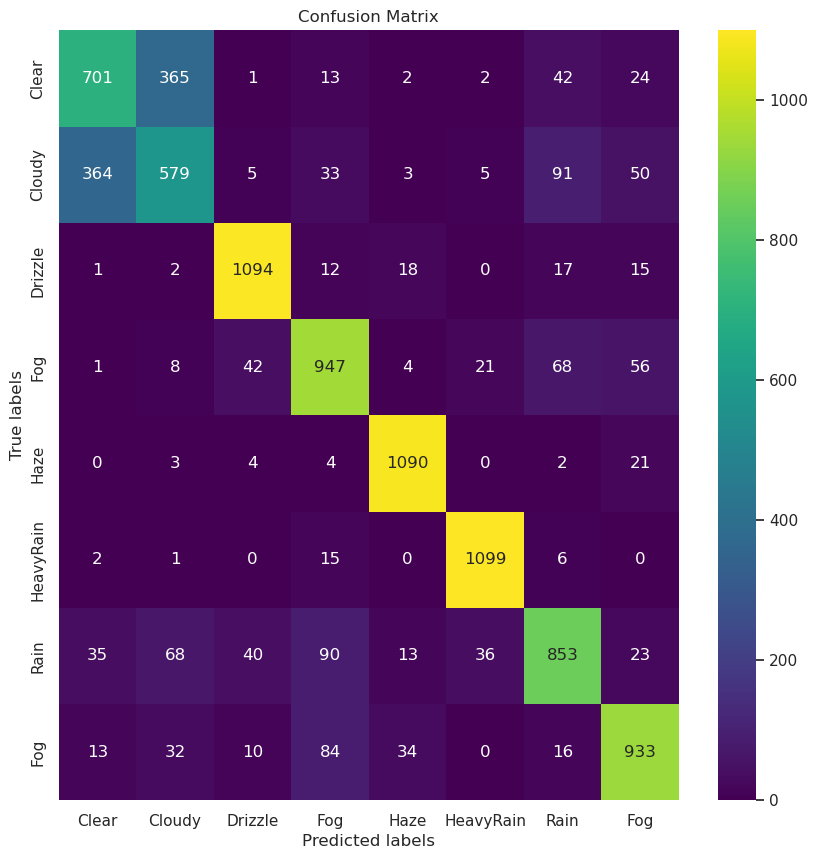

In [90]:
sns.set_theme(rc={'figure.figsize':(10,10)})
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']); ax.yaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']);

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1150
           1       0.55      0.51      0.53      1130
           2       0.91      0.94      0.93      1159
           3       0.79      0.83      0.81      1147
           4       0.94      0.97      0.95      1124
           5       0.94      0.98      0.96      1123
           6       0.78      0.74      0.76      1158
           7       0.83      0.83      0.83      1122

    accuracy                           0.80      9113
   macro avg       0.80      0.80      0.80      9113
weighted avg       0.80      0.80      0.80      9113



In [92]:
acc3 = forest.score(newX_test,y_test)
print(acc3)

0.8006145067486009


## Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(newX_train, y_train)

GaussianNB()

In [95]:
y_pred = classifierNB.predict(newX_test)

In [96]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 615  210   17   24    3    3  128  150]
 [ 392  241   46   62   23   18  194  154]
 [   0    0  551  441   95    1   71    0]
 [   0    0    0 1100   47    0    0    0]
 [   0    0    0   69 1054    0    0    1]
 [   1   10    0  809    0  300    3    0]
 [  14  104  193  383   44   47  367    6]
 [  51   44   48  229  305    0    0  445]]


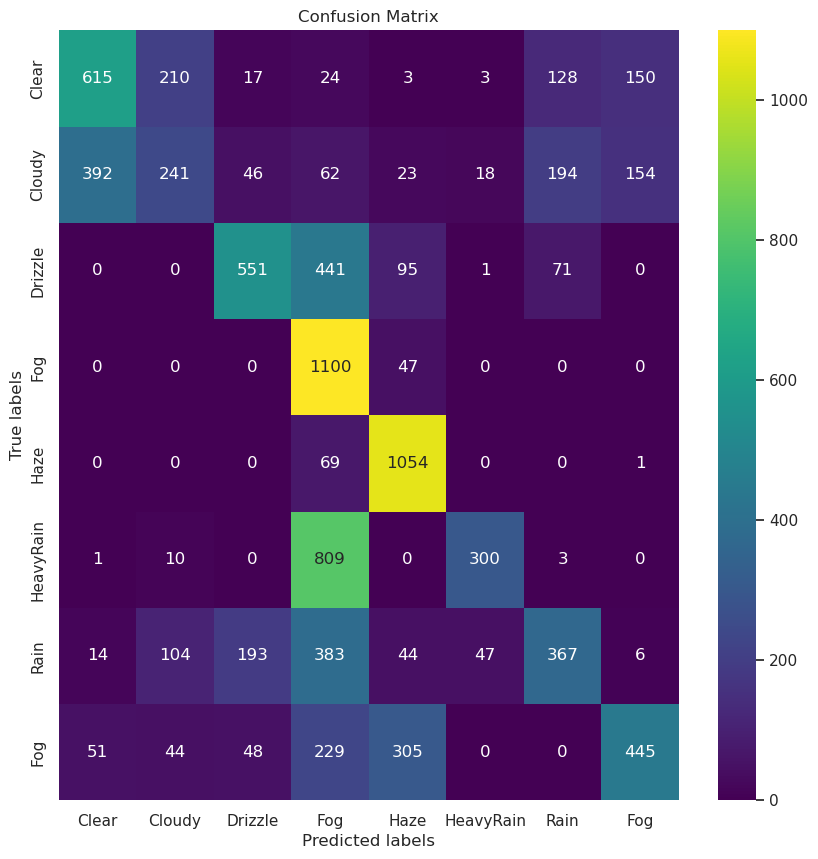

In [97]:
sns.set_theme(rc={'figure.figsize':(10,10)})
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']); ax.yaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']);

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1150
           1       0.40      0.21      0.28      1130
           2       0.64      0.48      0.55      1159
           3       0.35      0.96      0.52      1147
           4       0.67      0.94      0.78      1124
           5       0.81      0.27      0.40      1123
           6       0.48      0.32      0.38      1158
           7       0.59      0.40      0.47      1122

    accuracy                           0.51      9113
   macro avg       0.56      0.51      0.49      9113
weighted avg       0.56      0.51      0.49      9113



In [99]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.512783935037858


## XGBoost

In [101]:
classifierXGB = XGBClassifier()
classifierXGB.fit(newX_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [102]:
y_pred = classifierXGB.predict(newX_test)

In [103]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 705  369    2   12    2    2   36   22]
 [ 355  586   12   31    6    6   92   42]
 [   0    2 1096   10   27    0   11   13]
 [   0    3   65  949    5   23   44   58]
 [   0    0    3    2 1097    0    6   16]
 [   1    1    0   13    0 1103    5    0]
 [  36   80   65  108   17   50  776   26]
 [  14   32   18  101   48    0    8  901]]


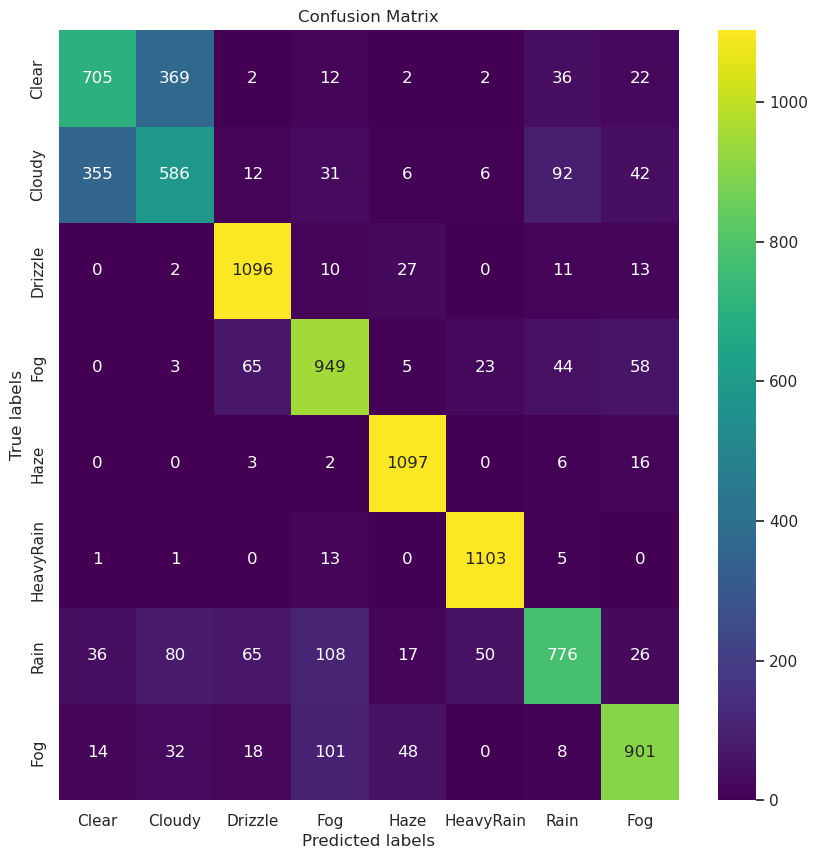

In [104]:
sns.set_theme(rc={'figure.figsize':(10,10)})
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']); ax.yaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']);

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1150
           1       0.55      0.52      0.53      1130
           2       0.87      0.95      0.91      1159
           3       0.77      0.83      0.80      1147
           4       0.91      0.98      0.94      1124
           5       0.93      0.98      0.96      1123
           6       0.79      0.67      0.73      1158
           7       0.84      0.80      0.82      1122

    accuracy                           0.79      9113
   macro avg       0.79      0.79      0.79      9113
weighted avg       0.79      0.79      0.79      9113



In [106]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc5}")

Accuracy score : 0.7915066388675519


## K-NN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(newX_train, y_train)

KNeighborsClassifier()

In [109]:
y_pred = classifierKNN.predict(newX_test)

In [110]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 692  376    2   12    2    4   38   24]
 [ 381  545   14   29    7   12   90   52]
 [   1    0 1110    9   24    0    7    8]
 [   1    5   54  940    6   22   65   54]
 [   0    0    3    2 1106    0    2   11]
 [   0    1    0   11    0 1106    5    0]
 [  52   79   71   99   21   57  751   28]
 [  24   43   20  105   47    0   20  863]]


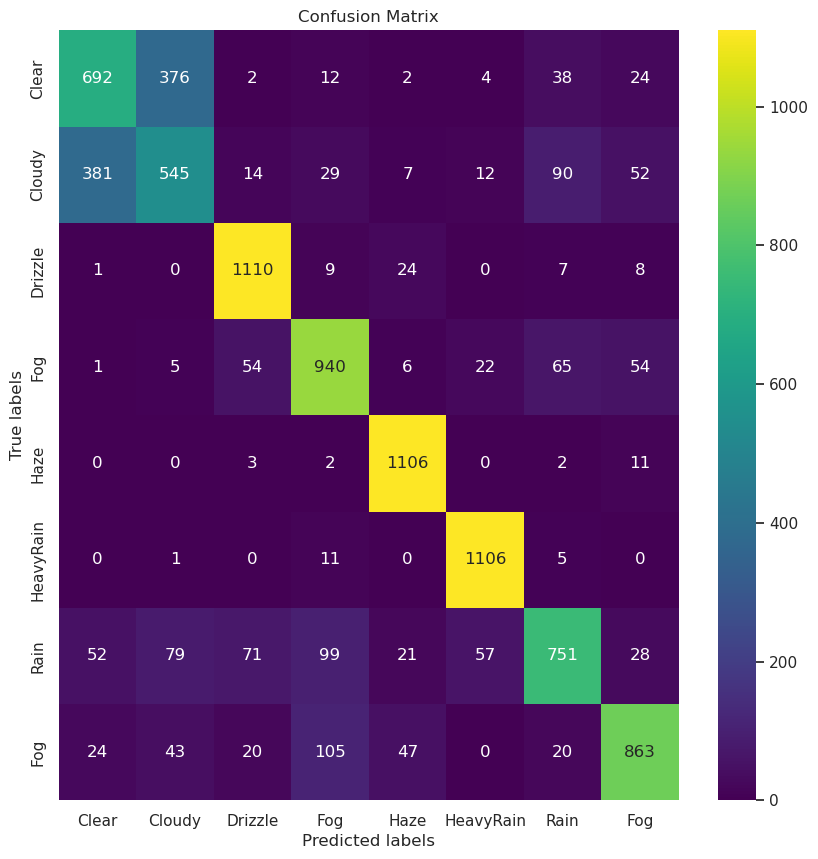

In [111]:
sns.set_theme(rc={'figure.figsize':(10,10)})
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']); ax.yaxis.set_ticklabels(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain', 'Fog']);

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1150
           1       0.52      0.48      0.50      1130
           2       0.87      0.96      0.91      1159
           3       0.78      0.82      0.80      1147
           4       0.91      0.98      0.95      1124
           5       0.92      0.98      0.95      1123
           6       0.77      0.65      0.70      1158
           7       0.83      0.77      0.80      1122

    accuracy                           0.78      9113
   macro avg       0.78      0.78      0.78      9113
weighted avg       0.77      0.78      0.78      9113



In [113]:
acc6 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc6}")

Accuracy score: 0.7805333040711072


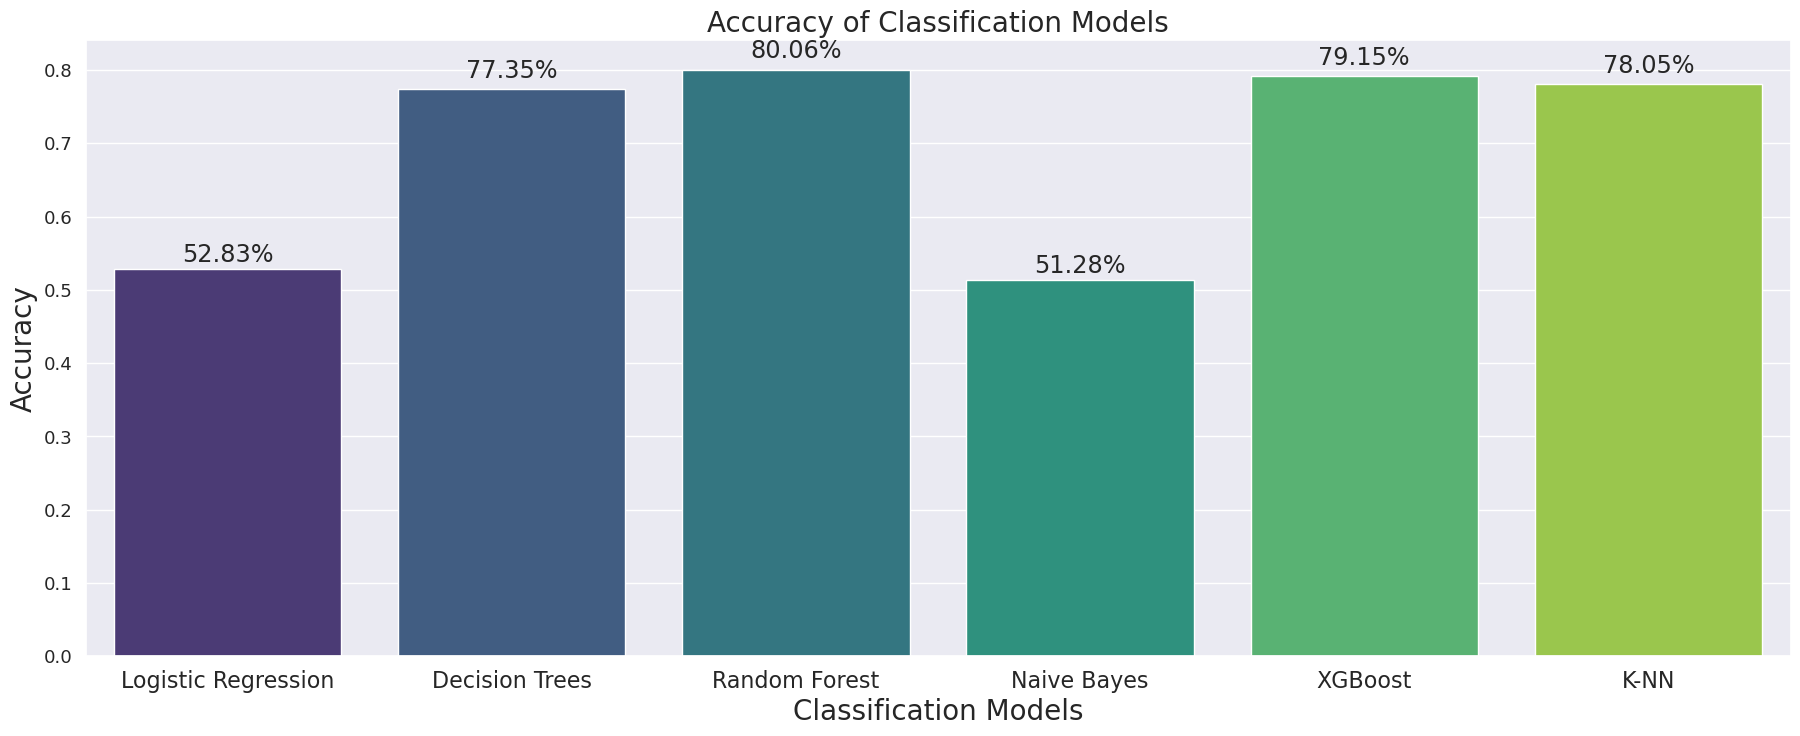

In [114]:
list1=[]
list2=[]
list1.append(acc1)
list2.append("Logistic Regression")
list1.append(acc2)
list2.append("Decision Trees")
list1.append(acc3)
list2.append("Random Forest")
list1.append(acc4)
list2.append("Naive Bayes")
list1.append(acc5)
list2.append("XGBoost")
list1.append(acc6)
list2.append("K-NN")

plt.rcParams['figure.figsize']=10,10
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=list2, y=list1, palette = "viridis")
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of Classification Models", fontsize = 20)
plt.xticks(fontsize = 16, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

#### From the above graph, we can see that the Random Forest classifier has the highest accuracy so it will therefore be the chosen model for our interface

## Saving the Chosen Trained Model

In [238]:
from joblib import dump

# Save the trained model to a file
dump(forest, 'random_forest_model.joblib')
dump (sc,'scaler.joblib')

['scaler.joblib']

In [243]:
from sklearn.model_selection import cross_val_score


# Assume X_train and y_train are your training features and labels

# Initialize the Random Forest classifier

# Perform k-fold cross-validation with k=5
# You can adjust the number of folds (k) as needed
k_fold = 5
cross_val_scores = cross_val_score(forest, newX_train, y_train, cv=k_fold)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.79003057 0.77803903 0.79238185 0.78339605 0.789746  ]
Mean CV Score: 0.7867186993675428
